In [39]:
import re
import pandas as pd

def preprocess(data):
    pattern = '\d{1,2}/\d{1,2}/\d{2},\s\d{1,2}:\d{2}\s[AP]M\s-\s'

    messages = re.split(pattern, data)[1:]
    dates = re.findall(pattern, data)

    df = pd.DataFrame({'user_message': messages, 'message_date': dates})
    # convert message_date type
    df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %I:%M %p - ')

    df.rename(columns={'message_date': 'date'}, inplace=True)

    users = []
    messages = []
    for message in df['user_message']:
        entry = re.split('([\w\W]+?):\s', message)
        if entry[1:]:  # user name
            users.append(entry[1])
            messages.append(" ".join(entry[2:]).rstrip())
        else:
            users.append('group_notification')
            messages.append(entry[0])

    df['user'] = users
    df['message'] = messages
    df.drop(columns=['user_message'], inplace=True)

    df['only_date'] = df['date'].dt.date
    df['year'] = df['date'].dt.year
    df['month_num'] = df['date'].dt.month
    df['month'] = df['date'].dt.month_name()
    df['day'] = df['date'].dt.day
    df['day_name'] = df['date'].dt.day_name()
    df['hour'] = df['date'].dt.hour
    df['minute'] = df['date'].dt.minute

    period = []
    for hour in df[['day_name', 'hour']]['hour']:
        if hour == 23:
            period.append(str(hour) + "-" + str('00'))
        elif hour == 0:
            period.append(str('00') + "-" + str(hour + 1))
        else:
            period.append(str(hour) + "-" + str(hour + 1))

    df['period'] = period
    
    security_message=df['message'] == "Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n"
    df=df[~security_message]
    return df

In [51]:
# Example usage
with open('group.txt', 'r', encoding='utf-8') as file:
    data = file.read()

In [52]:
df = preprocess(data)

In [53]:
df.sample(5)

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
17298,2022-04-03 02:10:00,Rohan,<Media omitted>,2022-04-03,2022,4,April,3,Sunday,2,10,2-3
35934,2022-08-28 23:52:00,Gitesh,🇮🇳🇮🇳,2022-08-28,2022,8,August,28,Sunday,23,52,23-00
24473,2022-04-03 12:16:00,Rohan,<Media omitted>,2022-04-03,2022,4,April,3,Sunday,12,16,12-13
2645,2022-04-01 07:54:00,Gitesh,<Media omitted>,2022-04-01,2022,4,April,1,Friday,7,54,7-8
15602,2022-04-03 02:04:00,Rohan,<Media omitted>,2022-04-03,2022,4,April,3,Sunday,2,4,2-3


In [54]:
# # Save the preprocess function to a pickle file
# import pickle

# pickle.dump(df,open('preprocess.pkl','wb'))

In [55]:
# model_scaler=pickle.load(open('scaler.pkl','rb'))

In [56]:
df[df['message']=="Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n"]

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period


In [57]:
word=[]
for i in df['message']:
    word.extend(i.split())

In [58]:
word

['<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omi

In [ ]:
## Media Shared ---

In [60]:
df[df['message']=="<Media omitted>"].shape[0]

32350

In [67]:
top_user=df['user'].value_counts().head()

In [73]:
percentage=round((top_user/top_user.sum())*100,2)

In [74]:
percentage

Rohan         41.13
Gitesh        39.92
Tushar Jio    17.29
Ayush🌀         1.16
Subham         0.49
Name: user, dtype: float64

In [76]:
import matplotlib.pyplot as plt

C:\Users\ayush\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ayush\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127744 missing from current font.
  font.set_text(s, 0, flags=flags)


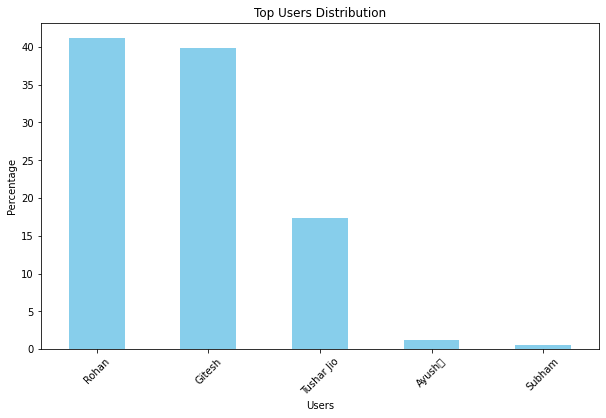

In [78]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
percentage.plot(kind='bar', color='skyblue')
plt.title('Top Users Distribution')
plt.xlabel('Users')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [85]:
temp=df[df['user']!='group_notofications']
temp=temp[temp['message']!='<Media omitted>']

In [86]:
temp

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
608,2022-03-31 21:01:00,Gitesh,😭,2022-03-31,2022,3,March,31,Thursday,21,1,21-22
3416,2022-04-01 11:59:00,Gitesh,❤️,2022-04-01,2022,4,April,1,Friday,11,59,11-12
3417,2022-04-01 11:59:00,Tushar Jio,Lawda pagal ho gya hai mc log,2022-04-01,2022,4,April,1,Friday,11,59,11-12
3418,2022-04-01 11:59:00,Tushar Jio,This message was deleted,2022-04-01,2022,4,April,1,Friday,11,59,11-12
3420,2022-04-01 12:00:00,Tushar Jio,This message was deleted,2022-04-01,2022,4,April,1,Friday,12,0,12-13
...,...,...,...,...,...,...,...,...,...,...,...,...
39993,2023-06-30 01:44:00,Gitesh,This message was deleted,2023-06-30,2023,6,June,30,Friday,1,44,1-2
39994,2023-07-02 06:48:00,group_notification,Your security code with Tushar Jio changed. Ta...,2023-07-02,2023,7,July,2,Sunday,6,48,6-7
39996,2023-07-06 23:00:00,group_notification,Your security code with Pratham changed. Tap t...,2023-07-06,2023,7,July,6,Thursday,23,0,23-00
39997,2023-07-13 18:36:00,group_notification,Your security code with Subham changed. Tap to...,2023-07-13,2023,7,July,13,Thursday,18,36,18-19


In [88]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()

In [93]:
words=[]

for i in temp['message']:
    for word in i.lower().split():
        if word not in stop_words:
            words.append(word)

In [94]:
words

['😭',
 '❤️',
 'lawda',
 'pagal',
 'gya',
 'mc',
 'message',
 'deleted',
 'message',
 'deleted',
 'message',
 'deleted',
 'dnge',
 'nikal',
 'marte',
 '😭😭😭😭😭',
 'message',
 'deleted',
 'message',
 'deleted',
 'message',
 'deleted',
 'birendra>>>>>>>>',
 'birendra',
 'phone',
 'gya',
 'lwdaa',
 '🔥',
 'muttu',
 'master',
 'chhor',
 'lwda',
 '\U0001f972',
 'message',
 'deleted',
 'message',
 'deleted',
 '🤣🤣🤣🤣🤣',
 'sahe',
 'lwdaa...',
 'famous',
 'gya',
 'bhenchoo',
 'ranu',
 'mondol',
 'mkb..',
 '🤬',
 'eee',
 'betichod',
 'hh😭😭😭',
 'mtlb',
 'hug',
 'bhenchod',
 'removed',
 '\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u2

In [95]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,🇮🇳,2884
1,🇮🇳🇮🇳,719
2,💦,306
3,❤️,216
4,❤️‍🔥,154
5,💦💦,146
6,message,108
7,deleted,106
8,mc,99
9,🇮🇳🇮🇳🇮🇳,88


In [98]:
df.groupby(['year','month_num']).count()['message']

year  month_num
2022  3             1490
      4            32120
      5              130
      6               36
      7               13
      8             5654
      9               20
      10             230
      11              54
      12              28
2023  1                7
      3               12
      4                1
      6              199
      7                4
      12               1
Name: message, dtype: int64